<a href="https://colab.research.google.com/github/matteoalberti/Lectures_introUML_Experis2020/blob/main/Day1_UML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Again!**

#### Introduction to Unsupervised Machine Learning Pt.1 : CUSTERING!



#### **Lecturer :** Matteo Alberti

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


## Introduction to Supervised and Unsupervised Machine Learning

![](https://www.diegocalvo.es/wp-content/uploads/2018/09/machine-learning-classification.png)




# Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

![](https://matteucci.faculty.polimi.it/Clustering/tutorial_html/images/clustering.gif)

In this case we easily identify the 4 clusters into which the data can be divided; the similarity criterion is **distance**: two or more objects belong to the same cluster if they are “close” according to a given distance (in this case geometrical distance). This is called **distance-based clustering**.



## Clustering vs Classification
Before starting our discussion on k-means clustering, I would like point out the difference between clustering and classification.

- Samples in a classification task have labels. Each data point is classified according to some measurements. Classification algorithms try to model the relationship between measurements (features) on samples and their assigned class. Then the model predicts the class of new samples.

- Samples in clustering do not have labels. We expect the model to find structures in the data set so that similar samples can be grouped into clusters. We basically ask the model to label samples.


#### Load Packages

In [18]:
#base
import pandas as pd
import numpy as np 

#preprocessing
from sklearn.preprocessing import StandardScaler

#plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

#models
from sklearn.cluster import KMeans


# DISTANCE BASED CLUSTERING : KMeans

K-means clustering aims to partition data into k clusters in a way that data points in the same cluster are **similar** (*determined by distance*) and data points in the different clusters are farther apart.

- There are many methods to measure the distance. 


Euclidean distance for example comes from **minkowski distance**

![](https://rittikghosh.com/images/min.png)


![](https://www.deeplearningitalia.com/wp-content/uploads/2018/12/ecuation-26.png)





### Let's try with syntetic data


*K-means clustering tries to minimize distances within a cluster and maximize the distance between different clusters.*

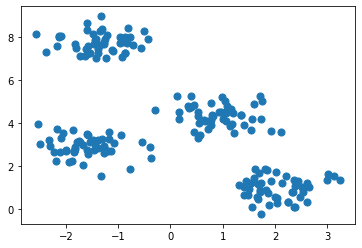

In [13]:

X_, y_ = make_blobs(n_samples = 200, centers=4, cluster_std = 0.5, random_state = 0)
plt.scatter(X_[:, 0], X_[:, 1], s=50)
plt.show()




***Introduction to Pseudocode : Kmeans***

![](https://www.cms.waikato.ac.nz/~abifet/book/images/Fig9-1.png)



**Summarize**

After number of clusters are determined, it works by executing the following steps:






Randomly select centroids (center of cluster) for each cluster.

![](https://healthcare.ai/wp-content/uploads/2017/07/Picture2.png)

Calculate the distance of all data points to the centroids.

![](https://healthcare.ai/wp-content/uploads/2017/07/Picture3-300x210.png)

Assign data points to the closest cluster.

![](https://healthcare.ai/wp-content/uploads/2017/07/Picture4-300x201.png)

Find the new centroids of each cluster by taking the mean of all data points in the cluster.

![](https://healthcare.ai/wp-content/uploads/2017/07/Picture5-300x187.png)

Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving.


![](https://miro.medium.com/max/480/1*KrcZK0xYgTa4qFrVr0fO2w.gif)

In [14]:
# define + fit

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

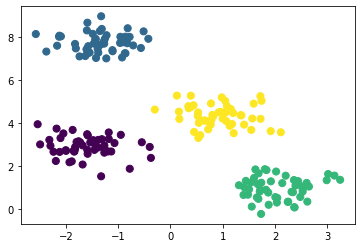

In [15]:
y_pred = kmeans.predict(X_)
plt.scatter(X_[:, 0], X_[:, 1], c = y_pred, s=50)
plt.show()

## Question 1) : How can I choose the right number of clusters?

*Remember we are not working with 2 variables (2d plots)*

### Back to WINE DATASET




In [16]:
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

In [20]:
# Normalizing over the standard deviation
features = df_wine.drop('quality', axis=1)
X =features.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

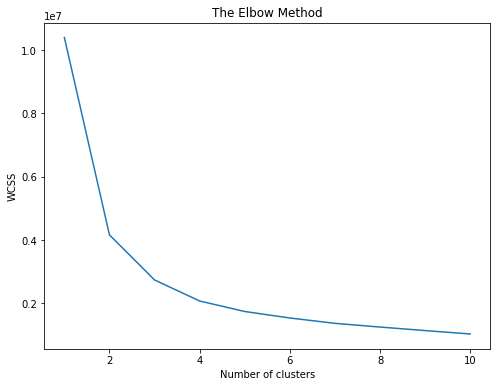

In [21]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
clusterNum = 3
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)


[2 0 1 ... 1 1 1]


In [24]:
# We assign the labels to each row in dataframe.
features['Clus_km'] = labels
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Clus_km
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [26]:
features.groupby('Clus_km').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Clus_km,,,,,,,,,,,
0,6.858405,0.274258,0.338425,6.725367,0.046783,36.894937,143.497215,0.994275,3.191651,0.484724,10.432226
1,6.778643,0.273081,0.317525,4.169605,0.040894,23.936318,96.066185,0.992331,3.187836,0.479766,11.109390
2,6.970133,0.293480,0.353396,9.356089,0.051796,50.696889,196.939111,0.996303,3.183013,0.514951,9.707156


In [32]:
# create 2 dimensional graph
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 9], X[:, 5], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

# What can I say about this plot?

good or a bad cluster segmentation?

Why?

In [32]:
f4 = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('pH')

ax.scatter(X[:, 9], X[:, 5], X[:, 7], c= labels.astype(np.float))
plt.show()

## Disadvantages of k-means clustering


- **Choosing k manually**. This is the greatest factor in the convergence of the algorithm and can provide widely different results for different values of k.
- Clustering data of varying sizes and density. K-means doesn’t perform well with **clusters of different sizes, shapes, and density**. To cluster such data, you need to generalize k-means.
- Clustering **outliers**. Outliers must be removed before clustering, or they may affect the position of the centroid or make a new cluster of their own.
Being dependent on initial values. As the value of k increases, other algorithms(i.e. k-means seeding) need to be applied to give better values for the initial centroids.
- **Scaling**. As the number of dimensions increases, the difficulty in getting the algorithm to converge increases due to the curse of dimensionality, discussed above.
- **Overlapping** between clusters, k-means doesn’t have an intrinsic measure for uncertainty; thus it’s difficult to identify which points in the overlapping region should be assigned to which class.

**Exercise :**

    Based on this PRO / CONS make your considerations on wine datasets (pre-processing)

## DENSITY BASED CLUSTERING : DBSCAN

*Density-Based Spatial Clustering of Applications with Noise*

*Pseudocode*


<img src=https://miro.medium.com/max/2144/1*_Wk6mbhHGv8nznWrv0WnDQ.png width="600"/>



**Summarize**

- DBSCAN begins with an arbitrary starting data point that has not been visited. The neighborhood of this point is extracted using a **distance epsilon ε**

- If there are a sufficient number of points (according to **minPoints**) within this neighborhood then the clustering process starts and the current data point becomes the first point in the new cluster. Otherwise, the point will be labeled as **noise**

- For this first point in the new cluster, the points within its ε distance neighborhood also become part of the same cluster. This procedure of making all points in the ε neighborhood belong to the same cluster is then repeated for all of the new points that have been just added to the cluster group.

- This process of steps 2 and 3 is repeated until all points in the cluster are determined i.e all points within the ε neighborhood of the cluster have been visited and labeled.

![](https://dashee87.github.io/images/DBSCAN_tutorial.gif)

**Advantages of DBSCAN**

- It does not require a pe-set number of clusters at all
- Identifies outliers as noises


**Disvantages of DBSCAN**

- It doesn’t perform as well as others when the clusters are of varying density
- This drawback also occurs with very high-dimensional (threshold ε)

## Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

![](https://dashee87.github.io/images/em_only.gif)

## Agglomerative Hierarchical Clustering


Unlike k-means and EM, hierarchical clustering (HC) doesn’t require the user to specify the number of clusters beforehand. Instead it returns an output

If done manually, the user may cut the dendrogram where the merged clusters are too far apart (represented by a long lines in the dendrogram). Alternatively, the user can just return a specific number of clusters (similar to k-means).

![](https://dashee87.github.io/images/hierarch.gif)



Another important concept in HC is the linkage criterion. This defines the distance between clusters as a function of the points in each cluster and determines which clusters are merged/split at each step.


![](https://dashee87.github.io/images/scikit_clustering_13_1.png)


*This is the MAIN problem with UNSUPERVISED LEARNING*

# Exercise : Analyze performances with IRIS datasets

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()

In [31]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']
